## Title:  Parkinson's Freezing of Gait Prediction

#### Cameron Presley
#### start date:  2023-05-17
#### contact info:  cameron@cameron-presley.com
#### Kaggel Competition - Final Submission Deadline - 2023 June 08

### references:

* @misc{tlvmc-parkinsons-freezing-gait-prediction,
    author = {Addison Howard, amit salomon, eran gazit, HCL-Jevster, Jeff Hausdorff, Leslie Kirsch, Maggie, Pieter Ginis, Ryan Holbrook, Yasir F Karim},
    title = {Parkinson's Freezing of Gait Prediction},
    publisher = {Kaggle},
    year = {2023},
    url = {https://kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction}
}

* Goki Fujiya : I leveraged several data preprocessing code snippets from here: https://www.kaggle.com/embed/gokifujiya/pd-fog-prediction-baseline-by-random-

#### Background

The goal is to detect freezing of gait (FOG), a debilitating symptom that afflicts many people with Parkinson’s disease, by developing machine learning model that has been trained on data collected from a wearable 3D lower back sensor. The value of this model is to help researchers better understand when and why FOG episodes occur. This will improve the ability of medical professionals to optimally evaluate, monitor, and ultimately, prevent FOG events.

#### Context

An estimated 7 to 10 million people around the world have Parkinson’s disease, many of whom suffer from freezing of gait (FOG). During a FOG episode, a patient's feet are “glued” to the ground, preventing them from moving forward despite their attempts. FOG has a profound negative impact on health-related quality of life—people who suffer from FOG are often depressed, have an increased risk of falling, are likelier to be confined to wheelchair use, and have restricted independence.

While researchers have multiple theories to explain when, why, and in whom FOG occurs, there is still no clear understanding of its causes. The ability to objectively and accurately quantify FOG is one of the keys to advancing its understanding and treatment. Collection and analysis of FOG events, such as with your data science skills, could lead to potential treatments.

There are many methods of evaluating FOG, though most involve FOG-provoking protocols. People with FOG are filmed while performing certain tasks that are likely to increase its occurrence. Experts then review the video to score each frame, indicating when FOG occurred. While scoring in this manner is relatively reliable and sensitive, it is extremely time-consuming and requires specific expertise. Another method involves augmenting FOG-provoking testing with wearable devices. With more sensors, the detection of FOG becomes easier, however, compliance and usability may be reduced. Therefore, a combination of these two methods may be the best approach. When combined with machine learning methods, the accuracy of detecting FOG from a lower back accelerometer is relatively high. However, the datasets used to train and test these algorithms have been relatively small and generalizability is limited to date. Furthermore, the emphasis has been on achieving high levels of accuracy, while precision, for example, has largely been ignored.

Competition hosts:

Center for the Study of Movement, Cognition, and Mobility (CMCM) Neurological Institute
Tel Aviv Sourasky Medical Center

Their collective goal is to improve the personalized treatment of age-related movement, cognition, and mobility disorders and to alleviate the associated burden. They leverage a combination of clinical, engineering, and neuroscience expertise to:
1) Gain new understandings into the physiologic and pathophysiologic mechanisms that contribute to cognitive and motor function, the factors that influence these functions, and their changes with aging and disease (e.g., Parkinson’s disease, Alzheimer’s)
2) Develop new methods and tools for the early detection and tracking of cognitive and motor decline. A major focus is on using leveraging wearable devices and digital technologies
3) Develop and evaluate novel methods for the prevention and treatment of gait, falls, and cognitive function.

### IMPACT

The work in this competition will help advance the evaluation, understanding and treatment of FOG, improving the lives of the many people who suffer from this debilitating Parkinson’s disease symptom.



#### Datasets

The data series include three datasets, collected under distinct circumstances:

The tDCS FOG (tdcsfog) dataset, comprising data series collected in the lab, as subjects completed a FOG-provoking protocol.

The DeFOG (defog) dataset, comprising data series collected in the subject's home, as subjects completed a FOG-provoking protocol

The Daily Living (daily) dataset, comprising one week of continuous 24/7 recordings from sixty-five subjects. Forty-five subjects exhibit FOG symptoms and also have series in the defog dataset, while the other twenty subjects do not exhibit FOG symptoms and do not have series elsewhere in the data.

* Metadata:

#### Approach

1. Detect FOG epsidoes from the tdcsfog and defog datasets.
2. Use the daily dataset to support detection modeling from tdcsfog and defog datasets - will require use of unsupervised or semi-supervised approaches.



In [1]:
#### Build header & import anticipated libraries for data operations, visualization, evaluation
author = 'Cameron Presley'
email = 'cameron@cameron-presley.com'
title =  'KAGGEL: Parkinson''s Freezing of Gait Prediction'

print ('Title :', title)
print ('')
print ('Author :', author)
print ('')
print ('email :', email)
print ('')


#Import the neccesary libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math

#library needed to read .xlsx files
#import xlrd

#data visualization librariers


import matplotlib.pyplot as plt
import seaborn as sns

#statistical analysis libraries

#import scipy.stats as stats
#import statsmodels.api as sm
#from statsmodels.stats.proportion import proportions_ztest
#from statsmodels.formula.api import ols # for ANOVA
#from statsmodels.stats.anova import anova_lm # for ANOVA
#from scipy.stats import chi2_contingency # for CHI SQUARE
#from scipy.stats import ttest_rel #paired T-test
#from scipy.stats import levene #Levene's test

#data cleansing tools
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.impute import KNNImputer
#import missingno as mi

#model building libraries and tools

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

# --> CLASSIFIER MODELS

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from sklearn.linear_model import LogisticRegression


#use seaborn styling
sns.set_style("whitegrid")





Title : KAGGEL: Parkinsons Freezing of Gait Prediction

Author : Cameron Presley

email : cameron@cameron-presley.com



### Load Data Sets

FOG Detection Data Sets
- these datasets consist of numerous .csv files with sensor data associated with subjects under different settings
- rather than load all fo them now, we will sample data from "tdscfog" and "defog"

## <a id = "link1"> EDA </a>

### tdcsfog sample and aggregate files

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import os          

os.getcwd()
os.chdir('/kaggle/')
        
os.getcwd()  


'/kaggle'

In [4]:
os.listdir('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train')

['defog', 'tdcsfog', 'notype']

In [5]:
os.chdir('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train')

In [6]:
# read in data

filename_1 = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/003f117e14.csv'
data_1 = pd.read_csv (filename_1)
df1 = data_1.copy()
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             4682 non-null   int64  
 1   AccV             4682 non-null   float64
 2   AccML            4682 non-null   float64
 3   AccAP            4682 non-null   float64
 4   StartHesitation  4682 non-null   int64  
 5   Turn             4682 non-null   int64  
 6   Walking          4682 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 256.2 KB


Explore 0330ea6680.csv (df1) : initial data review


In [7]:
#open up view of columns and manage the number of rows being viewed
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',30)

#set random seed(99) and sample(15)
np.random.seed(99)
df1.sample(n=15)

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
2888,2888,-8.798560,0.694807,3.510468,0,0,0
286,286,-9.521264,0.547648,-1.525051,0,0,0
4522,4522,-9.455166,0.580288,-3.706799,0,0,0
3644,3644,-7.424302,0.403091,4.871339,0,0,0
4520,4520,-9.598256,0.683729,-1.584154,0,0,0
3214,3214,-7.517798,1.635714,4.595138,0,0,0
4678,4678,-9.341410,0.347721,-2.321991,0,0,0
3861,3861,-8.687524,-1.325244,3.787635,0,0,0
4028,4028,-7.602881,0.062600,4.350435,0,0,0
668,668,-10.511191,0.609693,-2.208429,0,0,0


In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,4682.0,2340.500000,1351.721310,0.000000,1170.250000,2340.500000,3510.750000,4681.000000
AccV,4682.0,-9.151214,1.384390,-23.796051,-9.537719,-9.234702,-8.470460,-3.915590
AccML,4682.0,0.753518,1.102125,-9.097370,0.322877,0.580891,1.368355,5.996704
AccAP,4682.0,2.471637,2.239906,-7.353417,1.966646,3.137857,3.819931,10.281080
StartHesitation,4682.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Turn,4682.0,0.168304,0.374176,0.000000,0.000000,0.000000,0.000000,1.000000
Walking,4682.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Observations
* Data set is numeric without any categorical data.
* Acceleration is measured in m/s^2
* AccV = lower back sensor acceleration - Vertical
* AccML = lower back sensor acceleration - Mediolateral
* AccAP = lower back sensor acceleration - Anteroposterior
* EVENT TYPES (3):
  - StartHestitation
  - Turn
  - Walking
* Acceleration is directional (+) and (-)
* This particular subject has no recorded activity for the 3 event types
* Time is measured in time steps @ 128Hz (128 time steps per second)
* 4,533 records, no missing data

In [9]:
df1.isnull().sum()

Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
dtype: int64

In [10]:
df1.isna().sum()

Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
dtype: int64

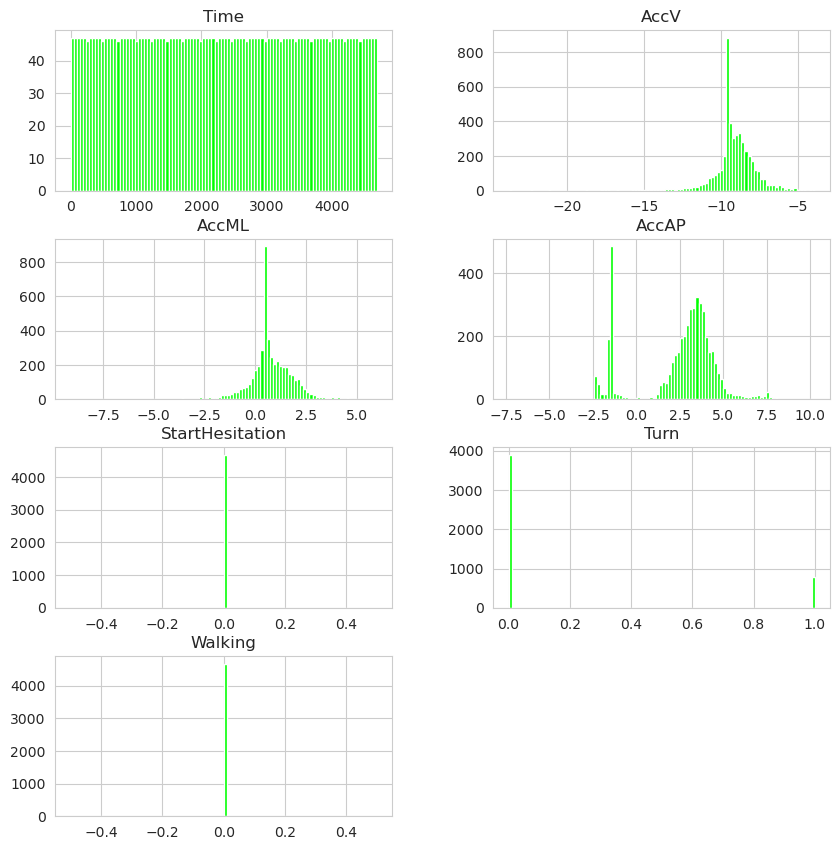

In [11]:
#look at data distribution - quick view
columns = list(df1)[0:] #showing all columns
df1[columns].hist(stacked = False, bins=100, figsize =(10,40), layout = (15,2), color ='lime');

#### Combine individual tdcsfog training files into a single dataframe

The 3 event types are reporting zero. At this point, we need to integrate the individual files to explore the population of training data for this protocol.

In [12]:
import os

In [13]:
# Set the directory path to the folder containing the CSV files.
tdcsfog_path = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog'
# Initialize an empty list to store the dataframes.
tdcsfog_list = []

# Loop through each file in the directory and read it into a dataframe.
for file_name in os.listdir(tdcsfog_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(tdcsfog_path, file_name)
        file = pd.read_csv(file_path)
        # file.Time = file.Time / (len(file) - 1)
        tdcsfog_list.append(file)

# Concatenate the dataframes vertically using pd.concat().
tdcsfog = pd.concat(tdcsfog_list, axis = 0)

# Show the concatenated dataframe.
tdcsfog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.665890,0.042550,0.184744,0,0,0
1,1,-9.672969,0.049217,0.184644,0,0,0
2,2,-9.670260,0.033620,0.193790,0,0,0
3,3,-9.673356,0.035159,0.184369,0,0,0
4,4,-9.671458,0.043913,0.197814,0,0,0
...,...,...,...,...,...,...,...
5153,5153,-9.915920,-0.105897,-1.123455,0,0,0
5154,5154,-9.693752,-0.066892,-1.114903,0,0,0
5155,5155,-9.548118,-0.098315,-1.112123,0,0,0
5156,5156,-9.469803,-0.111004,-1.130814,0,0,0


In [14]:
tdcsfog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7062672 entries, 0 to 5157
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             int64  
 1   AccV             float64
 2   AccML            float64
 3   AccAP            float64
 4   StartHesitation  int64  
 5   Turn             int64  
 6   Walking          int64  
dtypes: float64(3), int64(4)
memory usage: 431.1 MB


In [15]:
tdcsfog.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,7062672.0,9289.467297,13998.925696,0.000000,2119.000000,4310.000000,8433.000000,97076.000000
AccV,7062672.0,-9.306317,1.080174,-35.521119,-9.762402,-9.363524,-8.776814,20.906953
AccML,7062672.0,-0.201251,1.269525,-26.164398,-0.929545,-0.172225,0.575211,27.484719
AccAP,7062672.0,1.808524,2.285849,-47.829639,0.567225,1.987101,3.449026,30.337694
StartHesitation,7062672.0,0.043155,0.203206,0.000000,0.000000,0.000000,0.000000,1.000000
Turn,7062672.0,0.237698,0.425673,0.000000,0.000000,0.000000,0.000000,1.000000
Walking,7062672.0,0.029428,0.169002,0.000000,0.000000,0.000000,0.000000,1.000000


### Correlation Matrix

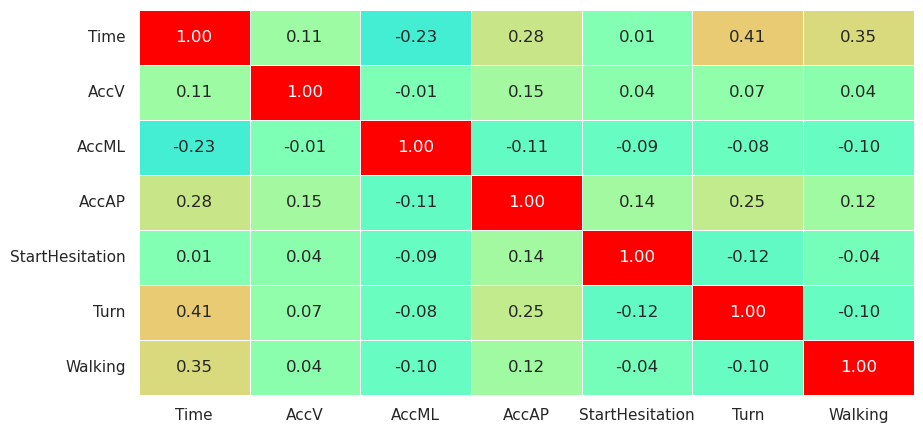

In [16]:
sns.set(rc={"figure.figsize": (10, 5)})
sns.heatmap(
    tdcsfog.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="rainbow",
    fmt="0.2f",
)
plt.show()

#### Reduce Memory Usage

In [17]:
def reduce_memory_usage(df):

    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024 ** 2
    print("Memory usage became: ",mem_usg," MB")

    return df

In [18]:
tdcsfog = reduce_memory_usage(tdcsfog)

Memory usage of dataframe is 431.07 MB
Memory usage became:  141.4452667236328  MB


In [19]:
print ('StartHesitation Mean =', tdcsfog['StartHesitation'].mean())
print ('Turn Mean =', tdcsfog['Turn'].mean())
print ('Walking Mean =', tdcsfog['Walking'].mean())

StartHesitation Mean = 0.0431550551972398
Turn Mean = 0.23769785712829367
Walking Mean = 0.029427672699510892


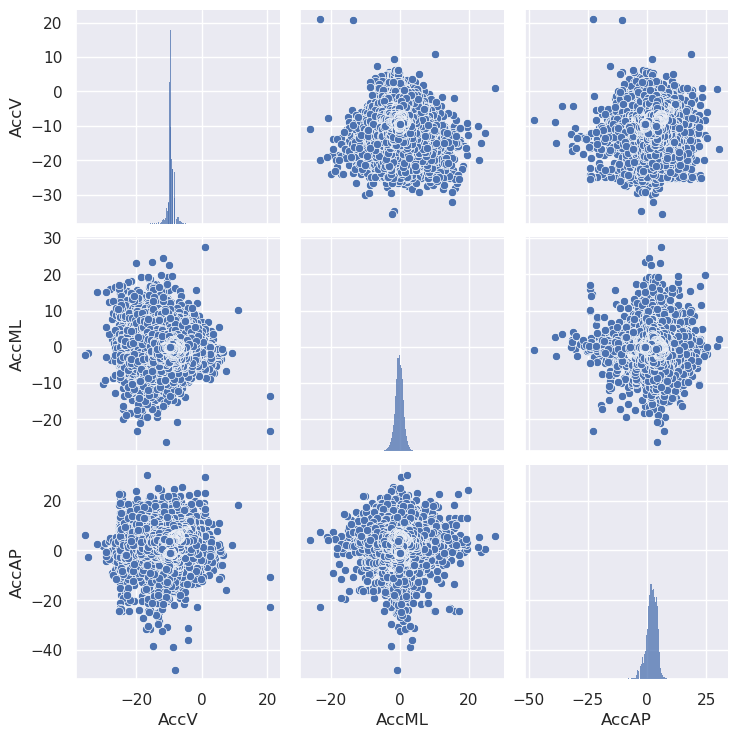

In [20]:
sns.pairplot(tdcsfog[['AccV', 'AccML', 'AccAP']], corner = False, palette ='icefire')
plt.show()

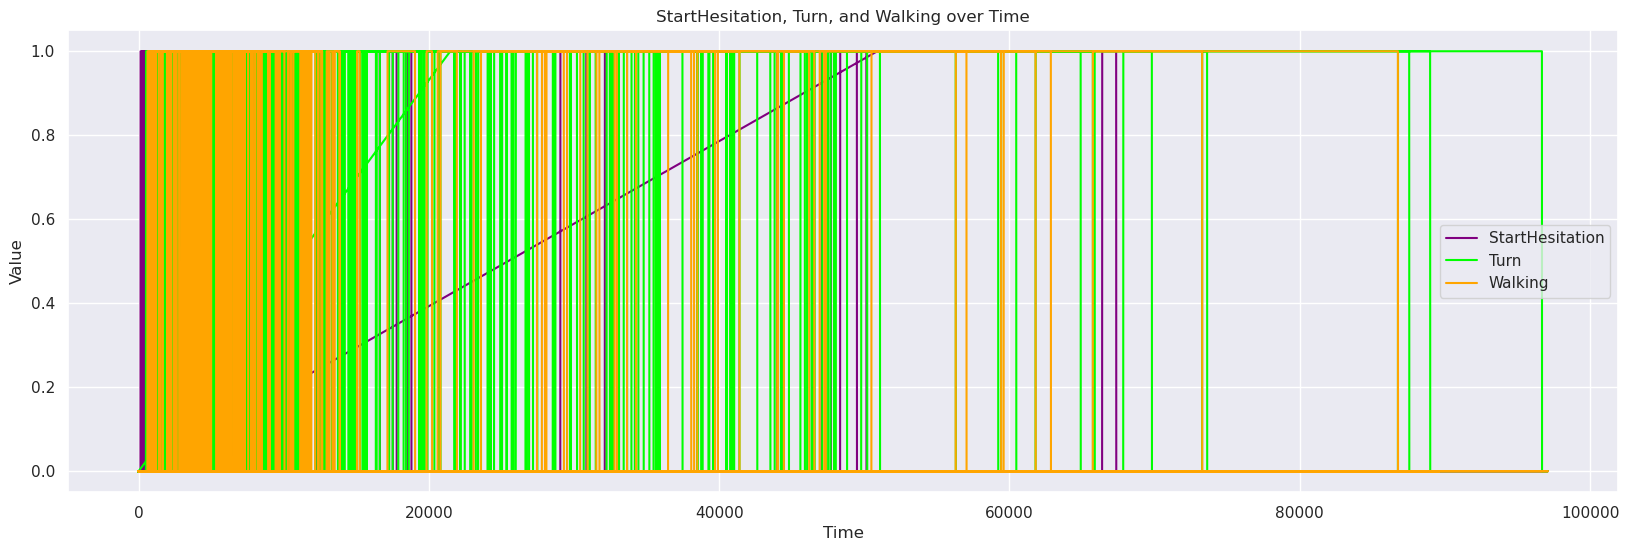

In [21]:
# Set the figure size.
plt.figure(figsize = (20,6))

# Plot StartHesitation values over time.
plt.plot(tdcsfog['Time'], tdcsfog['StartHesitation'], label = 'StartHesitation', color = 'purple')

# Plot the Turn values over time.
plt.plot(tdcsfog['Time'], tdcsfog['Turn'], label = 'Turn', color = 'lime')

# Plot the Walking values over time.
plt.plot(tdcsfog['Time'], tdcsfog['Walking'], label = 'Walking', color = 'orange')

# Add a legend to the plot.
plt.legend()

# Set the x-label of the plot.
plt.xlabel('Time')

# Set the y-label of the plot.
plt.ylabel('Value')

# Set the title of the plot.
plt.title('StartHesitation, Turn, and Walking over Time')

#cmap = plt.get_cmap ('coolwarm')
#plt.set_cmap (cmap)

# Display the plot.
plt.show()

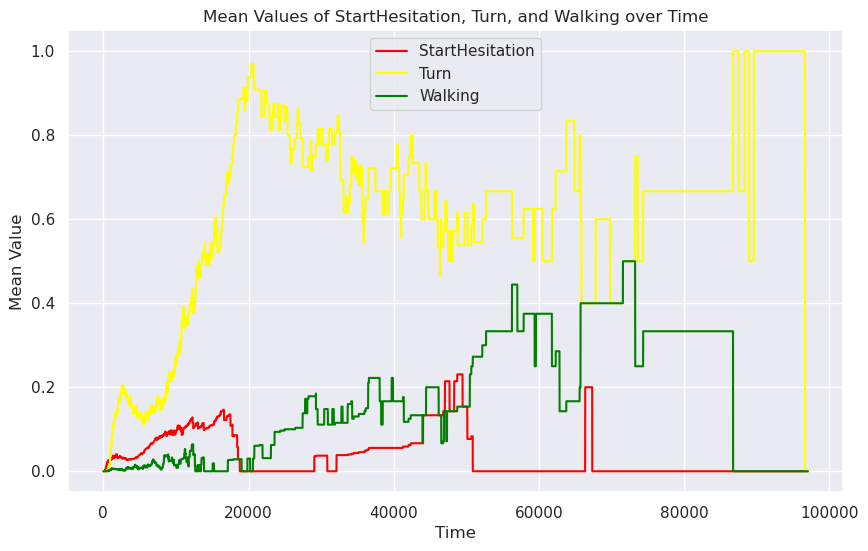

In [22]:
# Set the figure size.
plt.figure(figsize = (10,6))

# Calculates the mean values of all other columns for each unique value of Time.
# Reset the index of the resulting dataframe.
tdcsfog_means = tdcsfog.groupby('Time').mean().reset_index()

# Plot the mean StartHesitation values over time.
plt.plot(tdcsfog_means['Time'], tdcsfog_means['StartHesitation'], label = 'StartHesitation', color = 'red')

# Plot the mean Turn values over time.
plt.plot(tdcsfog_means['Time'], tdcsfog_means['Turn'], label = 'Turn', color = 'yellow')

# Plot the mean Walking values over time.
plt.plot(tdcsfog_means['Time'], tdcsfog_means['Walking'], label = 'Walking', color = 'green')

# Add a legend to the plot.
plt.legend()

# Set the x-label of the plot.
plt.xlabel('Time')

# Set the y-label of the plot.
plt.ylabel('Mean Value')

# Set the title of the plot.
plt.title('Mean Values of StartHesitation, Turn, and Walking over Time')

#cmap = plt.get_cmap ('coolwarm')
#plt.set_cmap (cmap)

# Display the plot.
plt.show()

### Explore Outliers

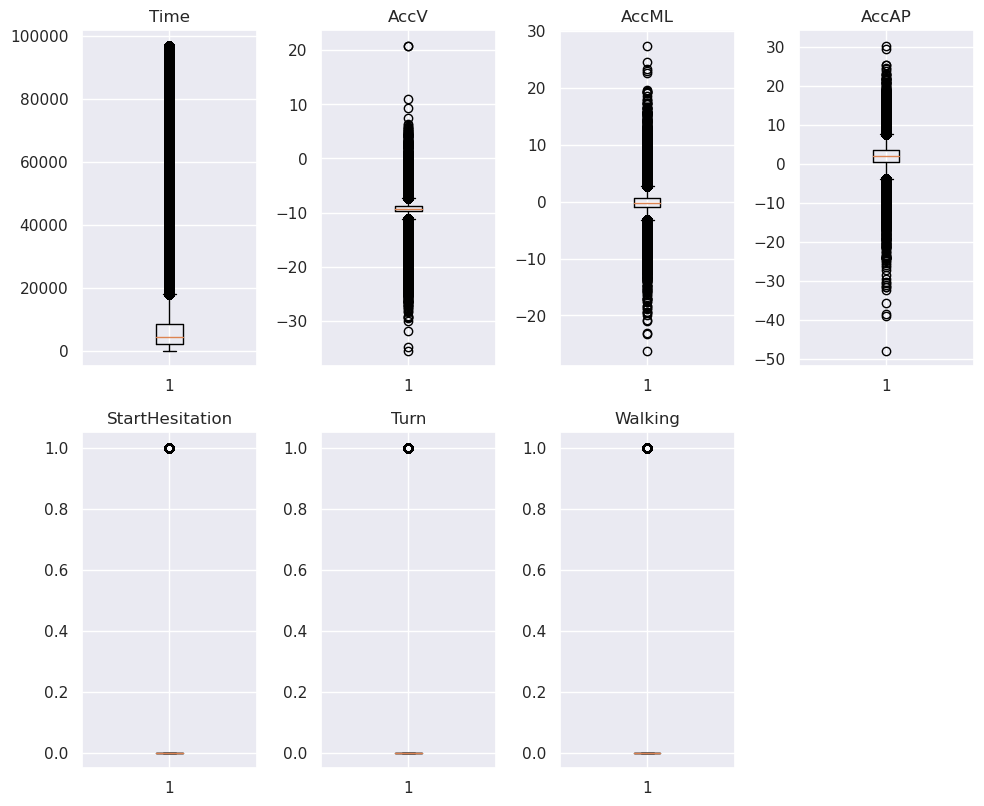

In [23]:
#Cite reference:  from Life Expectancy Case Stdy
# outlier detection aggregated in one spot
numeric_columns = tdcsfog.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10,20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5,4,i+1)
    plt.boxplot(tdcsfog[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observations

* Outliers

    This data set has a high level of outliers as shown.  Need to use a ML Model that is "not" sensitive to Outliers or we will need to treat the outliers.  Will start with former approach.


* Imbalanced Predictors

    Distribution of predictor values also indicate a high concentration of zeros. We will need to balance Predictor variables (StartHesitation, Turn, and Walking) given this concentration of zeros. Wait until we have a combined dataset.

* Influence of Time

    It is dubious whether Time has an influence on Predictor values.

### EDA defog training data

In [24]:
# read in data

filename_2 = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/13a4fe5159.csv'

data_2= pd.read_csv (filename_2)
df2 = data_2.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189216 entries, 0 to 189215
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             189216 non-null  int64  
 1   AccV             189216 non-null  float64
 2   AccML            189216 non-null  float64
 3   AccAP            189216 non-null  float64
 4   StartHesitation  189216 non-null  int64  
 5   Turn             189216 non-null  int64  
 6   Walking          189216 non-null  int64  
 7   Valid            189216 non-null  bool   
 8   Task             189216 non-null  bool   
dtypes: bool(2), float64(3), int64(4)
memory usage: 10.5 MB


In [25]:
n = len(pd.unique(df2['Task']))

print("No.of.unique values :",
      n)

No.of.unique values : 2


In [26]:
pd.unique(df2['Task'])

array([False,  True])

In [27]:
df2.head(5)

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-0.921875,0.046875,-0.281043,0,0,0,False,False
1,1,-0.921875,0.046875,-0.265625,0,0,0,False,False
2,2,-0.921875,0.046875,-0.265625,0,0,0,False,False
3,3,-0.921875,0.031312,-0.265625,0,0,0,False,False
4,4,-0.921875,0.031250,-0.265625,0,0,0,False,False


In [28]:
df2.tail (5)

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
189211,189211,-0.907003,0.031250,-0.328125,0,0,0,False,False
189212,189212,-0.906250,0.031250,-0.328125,0,0,0,False,False
189213,189213,-0.906250,0.031250,-0.314222,0,0,0,False,False
189214,189214,-0.906250,0.017936,-0.325814,0,0,0,False,False
189215,189215,-0.906250,0.015625,-0.328125,0,0,0,False,False


In [29]:
df2.isnull().sum()

Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
Valid              0
Task               0
dtype: int64

In [30]:
df2.isna().sum()

Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
Valid              0
Task               0
dtype: int64

In [31]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,189216.0,94607.500000,54622.098605,0.000000,47303.750000,94607.500000,141911.250000,189215.000000
AccV,189216.0,-0.913287,0.055552,-1.650794,-0.944537,-0.906250,-0.890625,-0.500000
AccML,189216.0,0.025698,0.062364,-0.493163,0.000000,0.029091,0.047526,0.443932
AccAP,189216.0,-0.239830,0.192285,-0.810538,-0.359811,-0.328125,-0.234375,0.296832
StartHesitation,189216.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Turn,189216.0,0.117442,0.321948,0.000000,0.000000,0.000000,0.000000,1.000000
Walking,189216.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


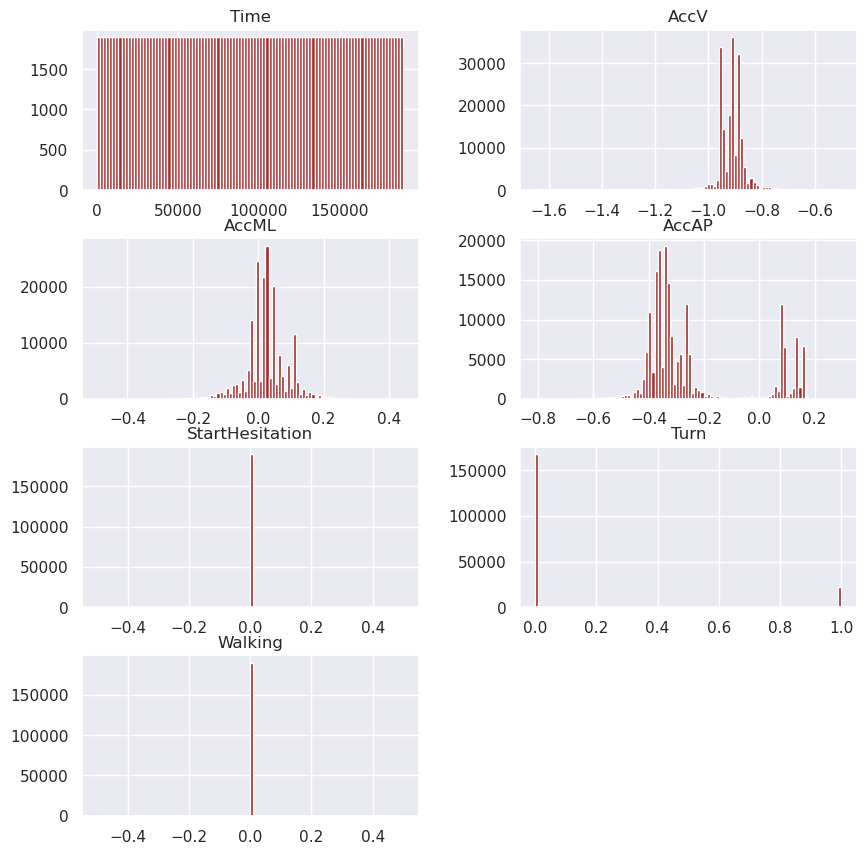

In [32]:
#look at data distribution - quick view
columns = list(df2)[0:] #showing all columns
df2[columns].hist(stacked = False, bins=100, figsize =(10,40), layout = (15,2), color ='brown');

In [33]:
# Set the directory path to the folder containing the CSV files.
defog_path = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog'

# Initialize an empty list to store the dataframes.
defog_list = []

# Loop through each file in the directory and read it into a dataframe.
for file_name in os.listdir(defog_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(defog_path, file_name)
        file = pd.read_csv(file_path)
        #file.Time = file.Time / (len(file) - 1)
        defog_list.append(file)

# Concatenate the dataframes vertically using pd.concat().
defog = pd.concat(defog_list, axis = 0)

# Show the concatenated dataframe.
defog

t = defog['Task'].unique()
v = defog['Valid'].unique()

print ('Unique Task Values:',t)
print ('Unique Valid Values:',v)

Unique Task Values: [False  True]
Unique Valid Values: [False  True]


In [34]:
defog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13525702 entries, 0 to 109124
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             int64  
 1   AccV             float64
 2   AccML            float64
 3   AccAP            float64
 4   StartHesitation  int64  
 5   Turn             int64  
 6   Walking          int64  
 7   Valid            bool   
 8   Task             bool   
dtypes: bool(2), float64(3), int64(4)
memory usage: 851.3 MB


In [35]:
defog.describe (include ='bool').T

,count,unique,top,freq
Valid,13525702,2,False,9435172
Task,13525702,2,False,9379725


### observations on Valid and Task

  False values represent about 70% of the data. We will be dropping this amount of data from defog

In [36]:
defog = reduce_memory_usage(defog)

Memory usage of dataframe is 851.34 MB
Memory usage became:  322.4778652191162  MB


In [37]:
# only consider records that are valid & annotated tasks
defog = defog[(defog['Task'] == 1) & (defog['Valid'] == 1)]


In [38]:
defog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090530 entries, 1000 to 108124
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             int32  
 1   AccV             float16
 2   AccML            float16
 3   AccAP            float16
 4   StartHesitation  int8   
 5   Turn             int8   
 6   Walking          int8   
 7   Valid            float16
 8   Task             float16
dtypes: float16(5), int32(1), int8(3)
memory usage: 97.5 MB


In [39]:
drop_cols = ['Valid','Task']
defog.drop(drop_cols, axis =1, inplace= True)

defog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090530 entries, 1000 to 108124
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             int32  
 1   AccV             float16
 2   AccML            float16
 3   AccAP            float16
 4   StartHesitation  int8   
 5   Turn             int8   
 6   Walking          int8   
dtypes: float16(3), int32(1), int8(3)
memory usage: 81.9 MB


In [40]:
print ('The unique values of StartHestitation are:', defog['StartHesitation'].unique())
print ('The unique values of Turn are:', defog['Turn'].unique())
print ('The unique values of Walking are:', defog['Walking'].unique())

The unique values of StartHestitation are: [0 1]
The unique values of Turn are: [0 1]
The unique values of Walking are: [0 1]


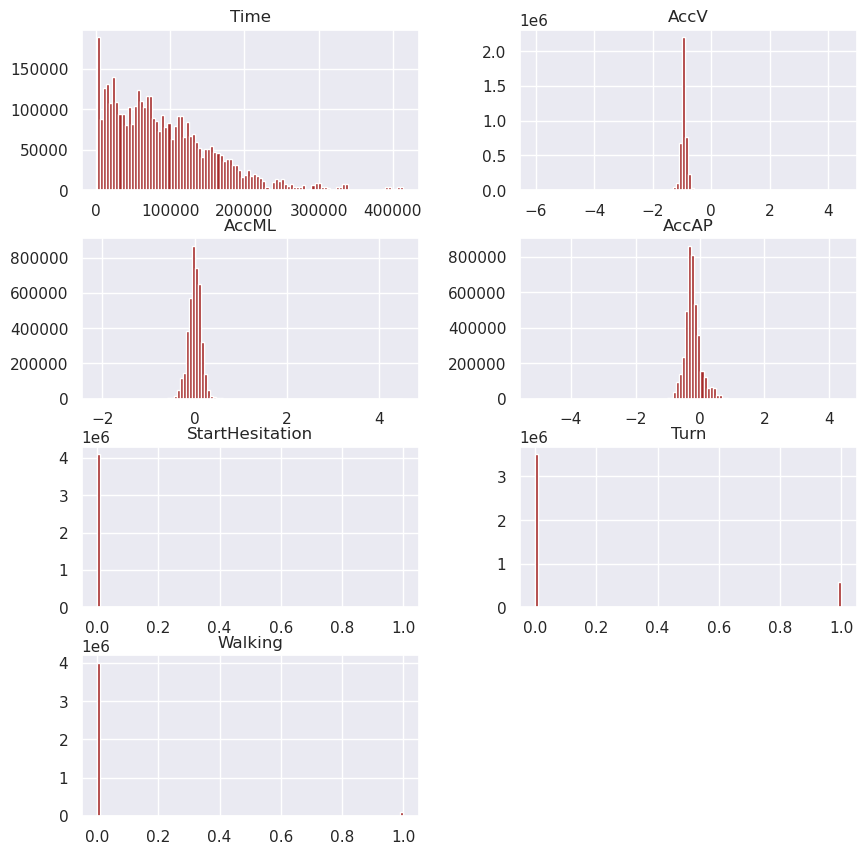

In [41]:
#look at data distribution - quick view
columns = list(defog)[0:] #showing all columns
defog[columns].hist(stacked = False, bins=100, figsize =(10,40), layout = (15,2), color ='brown');

In [42]:
tdcsfog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7062672 entries, 0 to 5157
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             int32  
 1   AccV             float16
 2   AccML            float16
 3   AccAP            float16
 4   StartHesitation  int8   
 5   Turn             int8   
 6   Walking          int8   
dtypes: float16(3), int32(1), int8(3)
memory usage: 141.4 MB


In [43]:
defog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090530 entries, 1000 to 108124
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             int32  
 1   AccV             float16
 2   AccML            float16
 3   AccAP            float16
 4   StartHesitation  int8   
 5   Turn             int8   
 6   Walking          int8   
dtypes: float16(3), int32(1), int8(3)
memory usage: 81.9 MB


In [44]:
# Build a combined training data set for model building

combined = pd.concat([tdcsfog, defog], axis = 0)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11153202 entries, 0 to 108124
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             int32  
 1   AccV             float16
 2   AccML            float16
 3   AccAP            float16
 4   StartHesitation  int8   
 5   Turn             int8   
 6   Walking          int8   
dtypes: float16(3), int32(1), int8(3)
memory usage: 223.4 MB


### row count totals check out after tdcsfog and defog are combined


### Explore Observed and Not Observed Balance for Predictor Variables (ZEROs and ONEs) balancing

In [45]:
print("StartHesitation Events Observed - Training : {0} ({1:0.2f}%)".format(len(combined.loc[combined['StartHesitation'] == 1]), (len(combined.loc[combined['StartHesitation'] == 1])/len(combined.index)) * 100))
print("StartHesitation Events Not-Observed - Training: {0} ({1:0.2f}%)".format(len(combined.loc[combined['StartHesitation'] == 0]), (len(combined.loc[combined['StartHesitation'] == 0])/len(combined.index)) * 100))
print("")

print("Turn Events Observed - Training : {0} ({1:0.2f}%)".format(len(combined.loc[combined['Turn'] == 1]), (len(combined.loc[combined['Turn'] == 1])/len(combined.index)) * 100))
print("Turn Events Not-Observed - Training: {0} ({1:0.2f}%)".format(len(combined.loc[combined['Turn'] == 0]), (len(combined.loc[combined['Turn'] == 0])/len(combined.index)) * 100))
print("")

print("Walking Events Observed - Training : {0} ({1:0.2f}%)".format(len(combined.loc[combined['Walking'] == 1]), (len(combined.loc[combined['Walking'] == 1])/len(combined.index)) * 100))
print("Walking Events Not-Observed - Training: {0} ({1:0.2f}%)".format(len(combined.loc[combined['Walking'] == 0]), (len(combined.loc[combined['Walking'] == 0])/len(combined.index)) * 100))
print("")


StartHesitation Events Observed - Training : 305290 (2.74%)
StartHesitation Events Not-Observed - Training: 10847912 (97.26%)

Turn Events Observed - Training : 2265611 (20.31%)
Turn Events Not-Observed - Training: 8887591 (79.69%)

Walking Events Observed - Training : 306356 (2.75%)
Walking Events Not-Observed - Training: 10846846 (97.25%)



#### Severely imbalanced data set.  

In [46]:
from sklearn.model_selection import train_test_split

predictors = ['StartHesitation','Turn','Walking']
X = combined.drop(predictors,axis=1)     # Drop target variables, leaving feature columns
y1 = combined ['StartHesitation'] # Target Variable
y2 = combined ['Turn'] # Target Variable
y3 = combined ['Walking'] # Target Variable

X1_train, X1_test, y1_train, y1_test  = train_test_split(X, y1, test_size=0.3, random_state=99)
X2_train, X2_test, y2_train, y2_test  = train_test_split(X, y2, test_size=0.3, random_state=1)
X3_train, X3_test, y3_train, y3_test  = train_test_split(X, y3, test_size=0.3, random_state=50)


# using 99 as the random seed

print('Independent variables for Start Hesitation Predictor - train and test split:', X1_train.shape, X1_test.shape)
print('Independent variables for Walking Predictor - train and test split:', X2_train.shape, X2_test.shape)
print('Independent variables for Turn Predictor - train and test split:', X2_train.shape, X2_test.shape)
print ('*'*120)

print('Start Hesitation predictor - train and test split:',y1_train.shape, y1_test.shape)
print('Turn predictor - train and test split:', y2_train.shape, y2_test.shape)
print('Walking predictor - train and test split:',y3_train.shape, y3_test.shape)



Independent variables for Start Hesitation Predictor - train and test split: (7807241, 4) (3345961, 4)
Independent variables for Walking Predictor - train and test split: (7807241, 4) (3345961, 4)
Independent variables for Turn Predictor - train and test split: (7807241, 4) (3345961, 4)
************************************************************************************************************************
Start Hesitation predictor - train and test split: (7807241,) (3345961,)
Turn predictor - train and test split: (7807241,) (3345961,)
Walking predictor - train and test split: (7807241,) (3345961,)


In [47]:
print("{0:0.2f}% data is in training set - Features".format((len(X1_train)/len(combined.index)) * 100))
print("{0:0.2f}% data is in test set - Features".format((len(X1_test)/len(combined.index)) * 100))

70.00% data is in training set - Features
30.00% data is in test set - Features


In [48]:
print("{0:0.2f}% data is in training set - Features".format((len(X2_train)/len(combined.index)) * 100))
print("{0:0.2f}% data is in test set - Features".format((len(X2_test)/len(combined.index)) * 100))

70.00% data is in training set - Features
30.00% data is in test set - Features


In [49]:
print("{0:0.2f}% data is in training set - Features".format((len(X3_train)/len(combined.index)) * 100))
print("{0:0.2f}% data is in test set - Features".format((len(X3_test)/len(combined.index)) * 100))

70.00% data is in training set - Features
30.00% data is in test set - Features


In [50]:
print("{0:0.2f}% data is in training set - y1".format((len(y1_train)/len(combined.index)) * 100))
print("{0:0.2f}% data is in test set - y1".format((len(y1_test)/len(combined.index)) * 100))

70.00% data is in training set - y1
30.00% data is in test set - y1


In [51]:
print("{0:0.2f}% data is in training set - y2".format((len(y2_train)/len(combined.index)) * 100))
print("{0:0.2f}% data is in test set - y2".format((len(y2_test)/len(combined.index)) * 100))

70.00% data is in training set - y2
30.00% data is in test set - y2


In [52]:
print("{0:0.2f}% data is in training set - y3".format((len(y3_train)/len(combined.index)) * 100))
print("{0:0.2f}% data is in test set - y3".format((len(y3_test)/len(combined.index)) * 100))

70.00% data is in training set - y3
30.00% data is in test set - y3


### Address True-False Balancing in Predictor Variables (Zeros and Ones)

### Predictor variables are severely imbalanced with 0's, need to use under/over sampling techniques using SMOTE & manual balancing approaches



In [53]:
from imblearn.over_sampling import SMOTE


#### oversampling: create oversampled training sets

#### Started Hesitation Predictor : Up Sampling

In [54]:
print("Before UpSampling, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train==1)))
print("Before UpSampling, counts of NEGATIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train==0)))
print('*'*120)

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=99)   #Synthetic Minority Over Sampling Technique
X1_train_over, y1_train_over = sm.fit_resample(X1_train, y1_train)

print("After UpSampling, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train_over==1)))
print("After UpSampling, counts of  NEGATIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train_over==0)))
print('*'*120)

print('After UpSampling, the shape of train_X: {}'.format(X1_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y1_train_over.shape))
print('*'*120)

Before UpSampling, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: 213605
Before UpSampling, counts of NEGATIVE FOG event observations of FOG events at Started Hesitation: 7593636
************************************************************************************************************************
After UpSampling, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: 7593636
After UpSampling, counts of  NEGATIVE FOG event observations of FOG events at Started Hesitation: 7593636
************************************************************************************************************************
After UpSampling, the shape of train_X: (15187272, 4)
After UpSampling, the shape of train_y: (15187272,) 

************************************************************************************************************************


#### Turn Predictor : Up Sampling

In [55]:
print("Before UpSampling, counts of  POSITIVE FOG event observations of FOG events at Turn: {}".format(sum(y2_train==1)))
print("Before UpSampling, counts of NEGATIVE FOG event observations of FOG events at Turn: {}".format(sum(y2_train==0)))
print('*'*120)

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X2_train_over, y2_train_over = sm.fit_resample(X2_train, y2_train)

print("After UpSampling, counts of  POSITIVE FOG event observations of FOG events at Turn: {}".format(sum(y2_train_over==1)))
print("After UpSampling, counts of  NEGATIVE FOG event observations of FOG events at Turn: {}".format(sum(y2_train_over==0)))
print('*'*120)

print('After UpSampling, the shape of train_X: {}'.format(X2_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y2_train_over.shape))
print('*'*120)

Before UpSampling, counts of  POSITIVE FOG event observations of FOG events at Turn: 1586060
Before UpSampling, counts of NEGATIVE FOG event observations of FOG events at Turn: 6221181
************************************************************************************************************************
After UpSampling, counts of  POSITIVE FOG event observations of FOG events at Turn: 6221181
After UpSampling, counts of  NEGATIVE FOG event observations of FOG events at Turn: 6221181
************************************************************************************************************************
After UpSampling, the shape of train_X: (12442362, 4)
After UpSampling, the shape of train_y: (12442362,) 

************************************************************************************************************************


#### Walking Predictor:  Up Sampling

In [56]:
print("Before UpSampling, counts of  POSITIVE FOG event observations of FOG events at Walking: {}".format(sum(y3_train==1)))
print("Before UpSampling, counts of NEGATIVE FOG event observations of FOG events at Walking: {}".format(sum(y3_train==0)))
print('*'*120)

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=50)   #Synthetic Minority Over Sampling Technique
X3_train_over, y3_train_over = sm.fit_resample(X3_train, y3_train)

print("After UpSampling, counts of  POSITIVE FOG event observations of FOG events at Turn: {}".format(sum(y3_train_over==1)))
print("After UpSampling, counts of  NEGATIVE FOG event observations of FOG events at Turn: {}".format(sum(y3_train_over==0)))
print('*'*120)

print('After UpSampling, the shape of train_X: {}'.format(X3_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y3_train_over.shape))
print('*'*120)

Before UpSampling, counts of  POSITIVE FOG event observations of FOG events at Walking: 213879
Before UpSampling, counts of NEGATIVE FOG event observations of FOG events at Walking: 7593362
************************************************************************************************************************
After UpSampling, counts of  POSITIVE FOG event observations of FOG events at Turn: 7593362
After UpSampling, counts of  NEGATIVE FOG event observations of FOG events at Turn: 7593362
************************************************************************************************************************
After UpSampling, the shape of train_X: (15186724, 4)
After UpSampling, the shape of train_y: (15186724,) 

************************************************************************************************************************


#### Under Sampling:  Create Under Sampling Data Sets

In [57]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 99)

#### Started Hesitation Predictor : Under Sampling

In [58]:
print("Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train==1)))
print("Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train==0)))

print ('*'*120)

X1_train_under, y1_train_under = rus.fit_resample(X1_train, y1_train)

print("Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train_under==1)))
print("Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train_under==0)))
print ('*'*120)

print('After Under Sampling, the shape of train_X: {}'.format(X1_train_under.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y1_train_under.shape))
print ('*'*120)





Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: 213605
Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Started Hesitation: 7593636
************************************************************************************************************************
Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: 213605
Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Started Hesitation: 213605
************************************************************************************************************************
After Under Sampling, the shape of train_X: (427210, 4)
After Under Sampling, the shape of train_y: (427210,) 

************************************************************************************************************************


#### Turn Predictor:  Under Sampling

In [59]:
print("Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Turn: {}".format(sum(y2_train==1)))
print("Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Turn: {}".format(sum(y2_train==0)))

print ('*'*120)

X2_train_under, y2_train_under = rus.fit_resample(X2_train, y2_train)

print("Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Turn: {}".format(sum(y2_train_under==1)))
print("Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Turn: {}".format(sum(y2_train_under==0)))
print ('*'*120)

print('After Under Sampling, the shape of train_X: {}'.format(X2_train_under.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y2_train_under.shape))
print ('*'*120)

Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Turn: 1586060
Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Turn: 6221181
************************************************************************************************************************
Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Turn: 1586060
Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Turn: 1586060
************************************************************************************************************************
After Under Sampling, the shape of train_X: (3172120, 4)
After Under Sampling, the shape of train_y: (3172120,) 

************************************************************************************************************************


#### Walking Predictor:  Under Sampling

In [60]:
print("Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Walking: {}".format(sum(y3_train==1)))
print("Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Walking: {}".format(sum(y3_train==0)))

print ('*'*120)

X3_train_under, y3_train_under = rus.fit_resample(X3_train, y3_train)

print("Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Walking: {}".format(sum(y3_train_under==1)))
print("Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Walking: {}".format(sum(y3_train_under==0)))
print ('*'*120)

print('After Under Sampling, the shape of train_X: {}'.format(X3_train_under.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y3_train_under.shape))
print ('*'*120)

Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Walking: 213879
Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Walking: 7593362
************************************************************************************************************************
Before Under Sampling, counts of  POSITIVE FOG event observations of FOG events at Walking: 213879
Before Under Sampling, counts of NEGATIVE FOG event observations of FOG events at Walking: 213879
************************************************************************************************************************
After Under Sampling, the shape of train_X: (427758, 4)
After Under Sampling, the shape of train_y: (427758,) 

************************************************************************************************************************


### Manually build a balanced data set for consideration as well

In [61]:
# Find the positions of y1 where it equals 0.
y1_zeros = np.where(y1 == 0)[0]
y1_ones = np.where(y1 == 1)[0]

# Choose the same number of samples with y1 == 1 as there are with y1 == 0.
num1_ones = (y1 == 1).sum()
np.random.seed(42)
y1_zeros = np.random.choice(np.where(y1 == 0)[0], size = num1_ones, replace = False)

# Combine the positions of y1 == 0 and y1 == 1.
y1_balanced_idxs = np.sort(np.concatenate([y1_zeros, y1_ones]))

# Use the balanced indices to get the corresponding rows of X and y1.
X1_balanced = X.iloc[y1_balanced_idxs, :]
y1_balanced = y1.iloc[y1_balanced_idxs]

In [62]:
# Find the positions of y2 where it equals 0.
y2_zeros = np.where(y2 == 0)[0]
y2_ones = np.where(y2 == 1)[0]

# Choose the same number of samples with y2 == 1 as there are with y2 == 0.
num2_ones = (y2 == 1).sum()
np.random.seed(42)
y2_zeros = np.random.choice(np.where(y2 == 0)[0], size = num2_ones, replace = False)

# Combine the positions of y2 == 0 and y2 == 1.
y2_balanced_idxs = np.sort(np.concatenate([y2_zeros, y2_ones]))

# Use the balanced indices to get the corresponding rows of X and y1.
X2_balanced = X.iloc[y2_balanced_idxs, :]
y2_balanced = y2.iloc[y2_balanced_idxs]

In [63]:
# Find the positions of y3 where it equals 0.
y3_zeros = np.where(y3 == 0)[0]
y3_ones = np.where(y3 == 1)[0]

# Choose the same number of samples with y3 == 1 as there are with y3 == 0.
num3_ones = (y3 == 1).sum()
np.random.seed(42)
y3_zeros = np.random.choice(np.where(y3 == 0)[0], size = num3_ones, replace = False)

# Combine the positions of y3 == 0 and y3 == 1.
y3_balanced_idxs = np.sort(np.concatenate([y3_zeros, y3_ones]))

# Use the balanced indices to get the corresponding rows of X and y3.
X3_balanced = X.iloc[y3_balanced_idxs, :]
y3_balanced = y3.iloc[y3_balanced_idxs]

In [64]:
X1_train_b, X1_test_b, y1_train_b, y1_test_b = train_test_split(X1_balanced, y1_balanced, test_size = 0.3, random_state = 99)
X2_train_b, X2_test_b, y2_train_b, y2_test_b = train_test_split(X2_balanced, y2_balanced, test_size = 0.3, random_state = 99)
X3_train_b, X3_test_b, y3_train_b, y3_test_b = train_test_split(X3_balanced, y3_balanced, test_size = 0.3, random_state = 99)

In [65]:
print("Before Balancing, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train==1)))
print("Before Balancing, counts of NEGATIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train==0)))
print('*'*120)

print("After Balancing, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train_b==1)))
print("After Balancing, counts of  NEGATIVE FOG event observations of FOG events at Started Hesitation: {}".format(sum(y1_train_b==0)))
print('*'*120)

print('After Balancing, the shape of train_X: {}'.format(X1_train_b.shape))
print('After Balancing, the shape of train_y: {} \n'.format(y1_train_b.shape))
print('*'*120)

Before Balancing, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: 213605
Before Balancing, counts of NEGATIVE FOG event observations of FOG events at Started Hesitation: 7593636
************************************************************************************************************************
After Balancing, counts of  POSITIVE FOG event observations of FOG events at Started Hesitation: 213581
After Balancing, counts of  NEGATIVE FOG event observations of FOG events at Started Hesitation: 213825
************************************************************************************************************************
After Balancing, the shape of train_X: (427406, 4)
After Balancing, the shape of train_y: (427406,) 

************************************************************************************************************************


## Model evaluation criteria

1 = "Yes" or Freezing of Gait (FOG) event observed
0 = "No" or Freezing of Gait (FOG) event "not" observed


* True Positive (TP)  is:  
    * Predict that a subject will experience a FOG event and a FOG event does occur.  
    * Predict = Y, Actual = Y

* False Positive (FP)  is:
  * Predict that a subject will experience a FOG event and a FOG event does "not" occur.
  * Predict = Y, Actual = N

* True Negative (TN)  is:
  * Predict a subject will "not" experience a FOG event and they do "not" experience a FOG event.
  * Predict = N, Actual = N

* False Negative (FN)  is:  
  * Predict that a subject will "not" experience a FOG event, however they "do" experience a FOG event.  
  * Predict = N, Actual = Y


The model will be evaluated on Mean Average Precision, or take the average of the precision for each predictor, and then the average of those precision calculations for an overall score.

Given that we want to maximize Precision, we need to minimize False Positives (FPs).



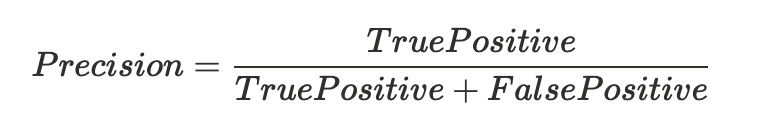


### Build confusion matrix to assess Precision

In [66]:
## Function to create confusion matrices
def make_confusion_matrix_1 (model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X1_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")




In [67]:
def make_confusion_matrix_2 (model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X2_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [68]:
def make_confusion_matrix_3 (model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X3_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Random Forest Modeling

### Under Sampling and Balanced Model Training

In [69]:
#StandardScaler(),

RF = make_pipeline (RandomForestClassifier(
        random_state=99,),
)


# Fit the model on training data - Under Sampling
#RF1_under = RF.fit (X1_train_under, y1_train_under)
#RF2_under = RF.fit (X2_train_under, y2_train_under)
#RF3_under = RF.fit (X3_train_under, y3_train_under)

#Fit the model on training data - Over Sampling

#RF1_over = RF.fit (X1_train_over, y1_train_over)
#RF2_over = RF.fit (X2_train_over, y2_train_over)
#RF3_over = RF.fit (X3_train_over, y3_train_over)

#Fit the model on training data - Balanced

RF1_b = RF.fit (X1_train_b, y1_train_b)
RF2_b = RF.fit (X2_train_b, y2_train_b)
RF3_b = RF.fit (X3_train_b, y3_train_b)



In [70]:
#pred_train_1_under = RF1_under.predict(X1_train_under)
#pred_test_1_under = RF1_under.predict(X1_test)

#train_acc_1_under = RF1_under.score(X1_train_under, y1_train_under)
#test_acc_1_under = RF1_under.score(X1_test, y1_test)

#train_recall_1_under = metrics.recall_score(y1_train_under, pred_train_1_under)
#test_recall_1_under = metrics.recall_score(y1_test, pred_test_1_under)

#train_precision_1_under = metrics.precision_score(y1_train_under, pred_train_1_under)
#test_precision_1_under = metrics.precision_score(y1_test, pred_test_1_under)


#pred_train_2_under = RF2_under.predict(X2_train_under)
#pred_test_2_under = RF2_under.predict(X2_test)

#train_acc_2_under = RF2_under.score(X2_train_under, y2_train_under)
#test_acc_2_under = RF2_under.score(X2_test, y2_test)

#train_recall_2_under= metrics.recall_score(y2_train_under, pred_train_2_under)
#test_recall_2_under = metrics.recall_score(y2_test, pred_test_2_under)

#train_precision_2_under = metrics.precision_score(y2_train_under, pred_train_2_under)
#test_precision_2_under = metrics.precision_score(y2_test, pred_test_2_under)

#pred_train_3_under = RF3_under.predict(X3_train_under)
#pred_test_3_under = RF3_under.predict(X3_test)

#train_acc_3_under = RF3_under.score(X3_train_under, y3_train_under)
#test_acc_3_under = RF3_under.score(X3_test, y3_test)

#train_recall_3_under = metrics.recall_score(y3_train_under, pred_train_3_under)
#test_recall_3_under = metrics.recall_score(y3_test, pred_test_3_under)

#train_precision_3_under = metrics.precision_score(y3_train_under, pred_train_3_under)
#test_precision_3_under = metrics.precision_score(y3_test, pred_test_3_under)

In [71]:
##pred_train_1_over = RF1_over.predict(X1_train_over)
##pred_test_1_over = RF1_over.predict(X1_test)

##train_acc_1_over = RF1_over.score(X1_train_over, y1_train_over)
##test_acc_1_over = RF1_over.score(X1_test, y1_test)

##train_recall_1_over = metrics.recall_score(y1_train_over, pred_train_1_over)
##test_recall_1_over = metrics.recall_score(y1_test, pred_test_1_over)

##train_precision_1_over = metrics.precision_score(y1_train_over, pred_train_1_over)
##test_precision_1_over = metrics.precision_score(y1_test, pred_test_1_over)


##pred_train_2_over = RF2_over.predict(X2_train_over)
##pred_test_2_over = RF2_over.predict(X2_test)

##train_acc_2_over = RF2_over.score(X2_train_over, y2_train_over)
##test_acc_2_over = RF2_over.score(X2_test, y2_test)

##train_recall_2_over= metrics.recall_score(y2_train_over, pred_train_2_over)
##test_recall_2_over = metrics.recall_score(y2_test, pred_test_2_over)

##train_precision_2_over = metrics.precision_score(y2_train_over, pred_train_2_over)
##test_precision_2_over = metrics.precision_score(y2_test, pred_test_2_over)

##pred_train_3_over = RF3_over.predict(X3_train_over)
##pred_test_3_over = RF3_over.predict(X3_test)

##train_acc_3_over = RF3_over.score(X3_train_over, y3_train_over)
##test_acc_3_over = RF3_over.score(X3_test, y3_test)

##train_recall_3_over = metrics.recall_score(y3_train_over, pred_train_3_over)
##test_recall_3_over = metrics.recall_score(y3_test, pred_test_3_over)

##train_precision_3_over = metrics.precision_score(y3_train_over, pred_train_3_over)
##test_precision_3_over = metrics.precision_score(y3_test, pred_test_3_over)

In [72]:
pred_train_1_b = RF1_b.predict(X1_train_b)
pred_test_1_b = RF1_b.predict(X1_test_b)

train_acc_1_b = RF1_b.score(X1_train_b, y1_train_b)
test_acc_1_b = RF1_b.score(X1_test_b, y1_test_b)

train_recall_1_b = metrics.recall_score(y1_train_b, pred_train_1_b)
test_recall_1_b = metrics.recall_score(y1_test_b, pred_test_1_b)

train_precision_1_b = metrics.precision_score(y1_train_b, pred_train_1_b)
test_precision_1_b = metrics.precision_score(y1_test_b, pred_test_1_b)


pred_train_2_b = RF2_b.predict(X2_train_b)
pred_test_2_b = RF2_b.predict(X2_test_b)

train_acc_2_b = RF2_b.score(X2_train_b, y2_train_b)
test_acc_2_b = RF2_b.score(X2_test_b, y2_test_b)

train_recall_2_b= metrics.recall_score(y2_train_b, pred_train_2_b)
test_recall_2_b = metrics.recall_score(y2_test_b, pred_test_2_b)

train_precision_2_b = metrics.precision_score(y2_train_b, pred_train_2_b)
test_precision_2_b = metrics.precision_score(y2_test_b, pred_test_2_b)

pred_train_3_b = RF3_b.predict(X3_train_b)
pred_test_3_b = RF3_b.predict(X3_test_b)

train_acc_3_b = RF3_b.score(X3_train_b, y3_train_b)
test_acc_3_b = RF3_b.score(X3_test_b, y3_test_b)

train_recall_3_b = metrics.recall_score(y3_train_b, pred_train_3_b)
test_recall_3_b = metrics.recall_score(y3_test_b, pred_test_3_b)

train_precision_3_b = metrics.precision_score(y3_train_b, pred_train_3_b)
test_precision_3_b = metrics.precision_score(y3_test_b, pred_test_3_b)

### RF1 Results - UNDER


In [73]:
  #print("Accuracy on training set : ", RF1_under.score(X1_train_under,y1_train_under))
  #print("Accuracy on test set : ", RF1_under.score(X1_test, y1_test))
  #print("Recall on training set : ", metrics.recall_score(y1_train_under, pred_train_1_under))
  #print("Recall on test set : ", metrics.recall_score(y1_test, pred_test_1_under))
  #print("Precision on training set : ", metrics.precision_score(y1_train_under, pred_train_1_under))
  #print("Precision on test set : ", metrics.precision_score(y1_test, pred_test_1_under))

### RF2 Results - UNDER

In [74]:
#print("Accuracy on training set : ", RF2_under.score(X2_train_under,y2_train_under))
#print("Accuracy on test set : ", RF2_under.score(X2_test, y2_test))
#print("Recall on training set : ", metrics.recall_score(y2_train_under, pred_train_2_under))
#print("Recall on test set : ", metrics.recall_score(y2_test, pred_test_2_under))
#print("Precision on training set : ", metrics.precision_score(y2_train_under, pred_train_2_under))
#print("Precision on test set : ", metrics.precision_score(y2_test, pred_test_2_under))

### RF3 Results - UNDER

In [75]:
#print("Accuracy on training set : ", RF3_under.score(X3_train_under,y3_train_under))
#print("Accuracy on test set : ", RF3_under.score(X3_test, y3_test))
#print("Recall on training set : ", metrics.recall_score(y3_train_under, pred_train_3_under))
#print("Recall on test set : ", metrics.recall_score(y3_test, pred_test_3_under))
#print("Precision on training set : ", metrics.precision_score(y3_train_under, pred_train_3_under))
#print("Precision on test set : ", metrics.precision_score(y3_test, pred_test_3_under))

### RF1 Results - Balanced

In [76]:
  print("Accuracy on training set : ", RF1_b.score(X1_train_b,y1_train_b))
  print("Accuracy on test set : ", RF1_b.score(X1_test_b, y1_test_b))
  print("Recall on training set : ", metrics.recall_score(y1_train_b, pred_train_1_b))
  print("Recall on test set : ", metrics.recall_score(y1_test_b, pred_test_1_b))
  print("Precision on training set : ", metrics.precision_score(y1_train_b, pred_train_1_b))
  print("Precision on test set : ", metrics.precision_score(y1_test_b, pred_test_1_b))

Accuracy on training set :  0.5223604722441894
Accuracy on test set :  0.5213512834790964
Recall on training set :  0.1471151460101788
Recall on test set :  0.14610343586779923
Precision on training set :  0.5883311176437546
Precision on test set :  0.5885789589281792


### RF2 Results - Balanced

In [77]:
print("Accuracy on training set : ", RF2_b.score(X2_train_b,y2_train_b))
print("Accuracy on test set : ", RF2_b.score(X2_test_b, y2_test_b))
print("Recall on training set : ", metrics.recall_score(y2_train_b, pred_train_2_b))
print("Recall on test set : ", metrics.recall_score(y2_test_b, pred_test_2_b))
print("Precision on training set : ", metrics.precision_score(y2_train_b, pred_train_2_b))
print("Precision on test set : ", metrics.precision_score(y2_test_b, pred_test_2_b))

Accuracy on training set :  0.5568454421781576
Accuracy on test set :  0.5575102235084418
Recall on training set :  0.1949312625942917
Recall on test set :  0.19586947724680867
Precision on training set :  0.7059887377204159
Precision on test set :  0.7074680967541337


### RF3 Results - Balanced

In [78]:
print("Accuracy on training set : ", RF3_b.score(X3_train_b,y3_train_b))
print("Accuracy on test set : ", RF3_b.score(X3_test_b, y3_test_b))
print("Recall on training set : ", metrics.recall_score(y3_train_b, pred_train_3_b))
print("Recall on test set : ", metrics.recall_score(y3_test_b, pred_test_3_b))
print("Precision on training set : ", metrics.precision_score(y3_train_b, pred_train_3_b))
print("Precision on test set : ", metrics.precision_score(y3_test_b, pred_test_3_b))

Accuracy on training set :  0.9999860106598771
Accuracy on test set :  0.9205392407542407
Recall on training set :  0.9999953352552082
Recall on test set :  0.9229197016807636
Precision on training set :  0.9999766767112297
Precision on test set :  0.9186650506449658


### The precision scores for the balanced data set are superior to the Under/Over Sampled using SMOTE. Use the Balanced Data set for the remainder of the model build.

In [79]:
# Creating new pipeline with best parameters
# ("scaler", StandardScaler()),


#rf_tuned = Pipeline(
#    steps=[
#        
#        (
#            "RF",
#            RandomForestClassifier(
#                
#                n_estimators=10,
#                min_samples_leaf = 6,
#                max_features = 'log2',
#                max_samples = None,
#                random_state=99
#                
#            ),
#        ),
#    ]
#)



In [80]:
# Fit the model on training data
#RF1 = rf_tuned.fit(X1_train_b, y1_train_b)


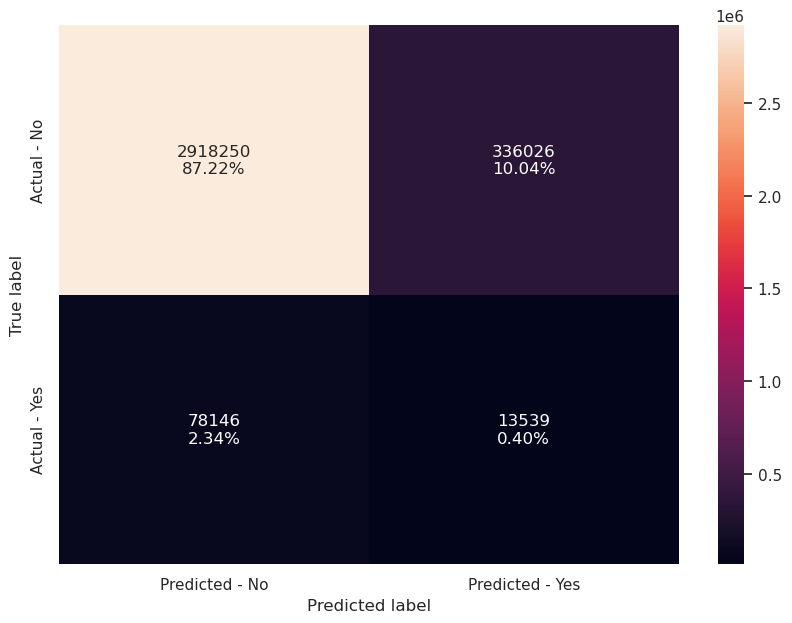

In [81]:
make_confusion_matrix_1 (RF1_b,y1_test)

In [82]:
# Fit the model on training data
#RF2 = rf_tuned.fit(X2_train_b, y2_train_b)

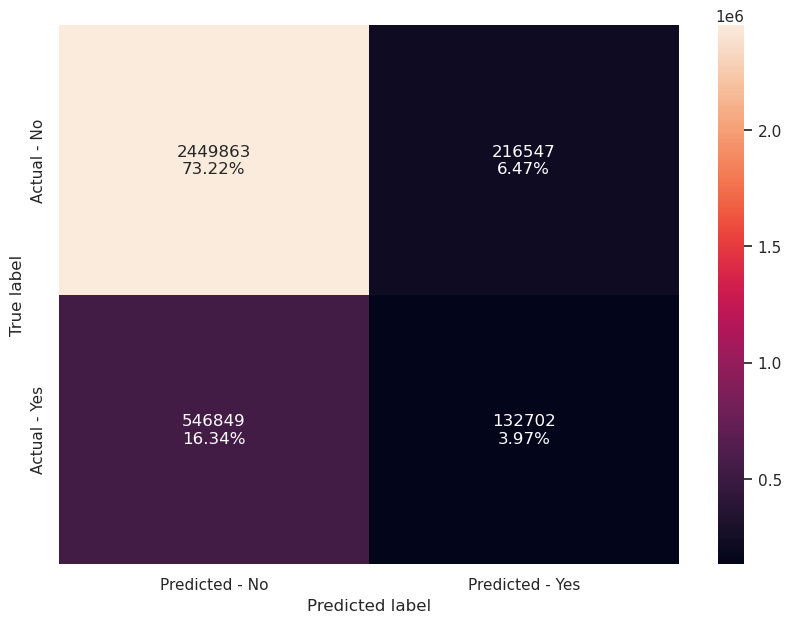

In [83]:
make_confusion_matrix_2 (RF2_b, y2_test)

In [84]:
# Fit the model on training dataR
#RF3 = rf_tuned.fit(X3_train_b, y3_train_b)

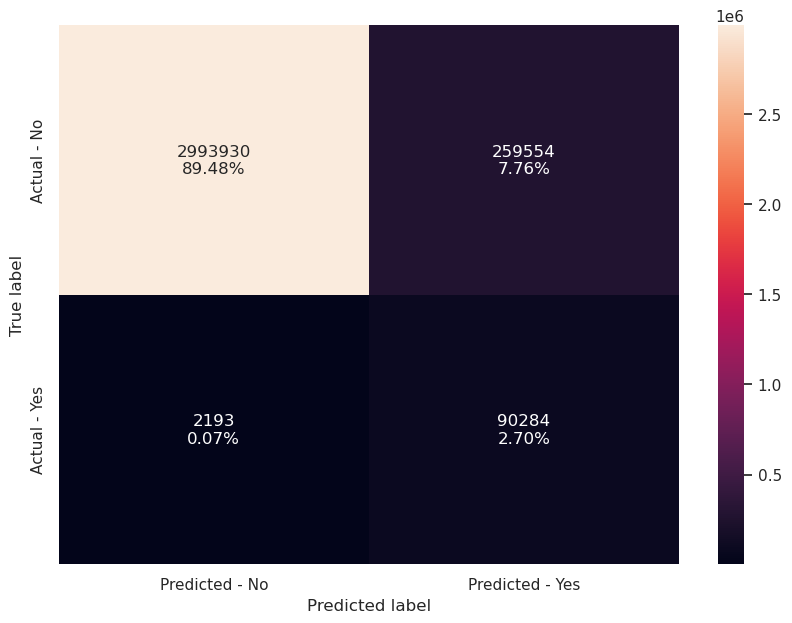

In [85]:
make_confusion_matrix_3 (RF3_b, y3_test)

### Build Test Data Set

In [86]:
# Set the directory path to the folder containing the CSV files.
tdcsfog_test_path = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/test/tdcsfog'

# Initialize an empty list to store the dataframes.
tdcsfog_test_list = []

# Loop through each file in the directory and read it into a dataframe.
for file_name in os.listdir(tdcsfog_test_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(tdcsfog_test_path, file_name)
        file = pd.read_csv(file_path)
        file['Id'] = file_name[:-4] + '_' + file['Time'].apply(str)
        # file.Time = file.Time / (len(file) - 1)
        tdcsfog_test_list.append(file)

# Concatenate the dataframes vertically using pd.concat().
tdcsfog_test = pd.concat(tdcsfog_test_list, axis = 0)

# Show the concatenated dataframe.
tdcsfog_test

,Time,AccV,AccML,AccAP,Id
0,0,-9.533939,0.566322,-1.413525,003f117e14_0
1,1,-9.536140,0.564137,-1.440621,003f117e14_1
2,2,-9.529345,0.561765,-1.429332,003f117e14_2
3,3,-9.531239,0.564227,-1.415490,003f117e14_3
4,4,-9.540825,0.561854,-1.429471,003f117e14_4
...,...,...,...,...,...
4677,4677,-9.351431,0.370047,-2.286318,003f117e14_4677
4678,4678,-9.341410,0.347721,-2.321991,003f117e14_4678
4679,4679,-9.350667,0.361341,-2.297158,003f117e14_4679
4680,4680,-9.343977,0.365726,-2.292650,003f117e14_4680


In [87]:
tdcsfog_test = reduce_memory_usage(tdcsfog_test)

Memory usage of dataframe is 0.18 MB
Memory usage became:  0.20650863647460938  MB


In [88]:
# Set the directory path to the folder containing the CSV files.
defog_test_path = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/test/defog'

# Initialize an empty list to store the dataframes.
defog_test_list = []

# Loop through each file in the directory and read it into a dataframe.
for file_name in os.listdir(defog_test_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(defog_test_path, file_name)
        file = pd.read_csv(file_path)
        file['Id'] = file_name[:-4] + '_' + file['Time'].apply(str)
        # file.Time = file.Time / (len(file) - 1)
        defog_test_list.append(file)

# Concatenate the dataframes vertically using pd.concat().
defog_test = pd.concat(defog_test_list, axis = 0)

# Show the concatenated dataframe.
defog_test

,Time,AccV,AccML,AccAP,Id
0,0,-0.914652,-0.300851,0.298156,02ab235146_0
1,1,-0.914367,-0.301572,0.298325,02ab235146_1
2,2,-0.779540,-0.343197,0.275690,02ab235146_2
3,3,-0.993162,-0.270281,0.315775,02ab235146_3
4,4,-0.948767,-0.307849,0.297191,02ab235146_4
...,...,...,...,...,...
281683,281683,-0.899299,-0.232668,0.389147,02ab235146_281683
281684,281684,-0.901973,-0.233051,0.390114,02ab235146_281684
281685,281685,-0.901690,-0.231888,0.391896,02ab235146_281685
281686,281686,-0.899576,-0.232429,0.391106,02ab235146_281686


In [89]:
defog_test = reduce_memory_usage(defog_test)

Memory usage of dataframe is 10.75 MB
Memory usage became:  13.972709655761719  MB


In [90]:
test = pd.concat([tdcsfog_test, defog_test], axis = 0).reset_index(drop = True)
test.info()
test.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286370 entries, 0 to 286369
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    286370 non-null  int32  
 1   AccV    286370 non-null  float16
 2   AccML   286370 non-null  float16
 3   AccAP   286370 non-null  float16
 4   Id      286370 non-null  object 
dtypes: float16(3), int32(1), object(1)
memory usage: 4.9+ MB


,Time,AccV,AccML,AccAP,Id
0,0,-9.531250,0.566406,-1.413086,003f117e14_0
1,1,-9.539062,0.563965,-1.440430,003f117e14_1
2,2,-9.531250,0.561523,-1.429688,003f117e14_2
3,3,-9.531250,0.564453,-1.415039,003f117e14_3
4,4,-9.539062,0.562012,-1.429688,003f117e14_4
5,5,-9.539062,0.552734,-1.414062,003f117e14_5
6,6,-9.531250,0.547852,-1.414062,003f117e14_6
7,7,-9.523438,0.552734,-1.416016,003f117e14_7
8,8,-9.539062,0.552734,-1.419922,003f117e14_8
9,9,-9.531250,0.548340,-1.416016,003f117e14_9


## Inference

In [91]:


# Separate the dataset for the independent variables.
test_X = test.iloc[:, 0:4]

# Standardize the independent variables by a new scaler.
#scaler = StandardScaler()
#scaler.fit(test_X)
#test_X = scaler.transform(test_X)

# Get the predictions for the three models on the test data.
pred_y1 = RF1_b.predict(test_X)
pred_y2 = RF2_b.predict(test_X)
pred_y3 = RF3_b.predict(test_X)

test['StartHesitation'] = pred_y1 # target variable for StartHesitation
test['Turn'] = pred_y2 # target variable for Turn
test['Walking'] = pred_y3 # target variable for Walking

# Get the probability predictions for the three models on the test data.
pred_proba_y1 = RF1_b.predict_proba(test_X)[:, 1]
pred_proba_y2 = RF2_b.predict_proba(test_X)[:, 1]
pred_proba_y3 = RF3_b.predict_proba(test_X)[:, 1]

# Update the values in the test dataframe.
test['StartHesitation'] = pred_proba_y1
test['Turn'] = pred_proba_y2
test['Walking'] = pred_proba_y3

test

,Time,AccV,AccML,AccAP,Id,StartHesitation,Turn,Walking
0,0,-9.531250,0.566406,-1.413086,003f117e14_0,0.00,0.00,0.00
1,1,-9.539062,0.563965,-1.440430,003f117e14_1,0.00,0.00,0.00
2,2,-9.531250,0.561523,-1.429688,003f117e14_2,0.00,0.00,0.00
3,3,-9.531250,0.564453,-1.415039,003f117e14_3,0.00,0.00,0.00
4,4,-9.539062,0.562012,-1.429688,003f117e14_4,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
286365,281683,-0.899414,-0.232666,0.389160,02ab235146_281683,0.29,0.29,0.29
286366,281684,-0.901855,-0.233032,0.390137,02ab235146_281684,0.31,0.31,0.31
286367,281685,-0.901855,-0.231934,0.391846,02ab235146_281685,0.31,0.31,0.31
286368,281686,-0.899414,-0.232422,0.391113,02ab235146_281686,0.29,0.29,0.29


### SUBMISSION

In [92]:
submission = test.iloc[:, 4:].fillna(0.0)
submission

,Id,StartHesitation,Turn,Walking
0,003f117e14_0,0.00,0.00,0.00
1,003f117e14_1,0.00,0.00,0.00
2,003f117e14_2,0.00,0.00,0.00
3,003f117e14_3,0.00,0.00,0.00
4,003f117e14_4,0.00,0.00,0.00
...,...,...,...,...
286365,02ab235146_281683,0.29,0.29,0.29
286366,02ab235146_281684,0.31,0.31,0.31
286367,02ab235146_281685,0.31,0.31,0.31
286368,02ab235146_281686,0.29,0.29,0.29


In [93]:
submission.head(20)

,Id,StartHesitation,Turn,Walking
0,003f117e14_0,0.0,0.0,0.0
1,003f117e14_1,0.0,0.0,0.0
2,003f117e14_2,0.0,0.0,0.0
3,003f117e14_3,0.0,0.0,0.0
4,003f117e14_4,0.0,0.0,0.0
5,003f117e14_5,0.0,0.0,0.0
6,003f117e14_6,0.0,0.0,0.0
7,003f117e14_7,0.0,0.0,0.0
8,003f117e14_8,0.0,0.0,0.0
9,003f117e14_9,0.0,0.0,0.0


In [94]:
submission.tail(20)

,Id,StartHesitation,Turn,Walking
286350,02ab235146_281668,0.29,0.29,0.29
286351,02ab235146_281669,0.29,0.29,0.29
286352,02ab235146_281670,0.29,0.29,0.29
286353,02ab235146_281671,0.29,0.29,0.29
286354,02ab235146_281672,0.29,0.29,0.29
286355,02ab235146_281673,0.29,0.29,0.29
286356,02ab235146_281674,0.29,0.29,0.29
286357,02ab235146_281675,0.29,0.29,0.29
286358,02ab235146_281676,0.29,0.29,0.29
286359,02ab235146_281677,0.29,0.29,0.29


In [95]:
submission.to_csv('/kaggle/working/submission.csv', index = False)